In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine
import seaborn as sns

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [69]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [70]:
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [71]:
continuous_features = ['overallqual', 'grlivarea', 'garagecars', 'firstflrsf',
                       'fullbath', 'yearbuilt', 'yearremodadd']

# New Dataframe with only features for our model
model_df = pd.DataFrame()

# Adding the continuous features to model_df
for col in continuous_features:
    model_df[col] = df[col]
    
# Adding the categorical features and target variable to model_df
model_df = pd.concat([model_df, pd.get_dummies(df[['neighborhood', 'exterqual', 'kitchenqual', 'garagefinish', 'bsmtqual']], drop_first=True), df['saleprice']], axis=1)


# X is all the features for the model
X = model_df[['overallqual', 'grlivarea', 'garagecars', 'firstflrsf', 'fullbath',
              'yearbuilt', 'yearremodadd', 'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
              'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
              'neighborhood_Gilbert', 'neighborhood_IDOTRR', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
              'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
              'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer',
              'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
              'neighborhood_Veenker', 'exterqual_Fa', 'exterqual_Gd', 'exterqual_TA', 'kitchenqual_Fa',
              'kitchenqual_Gd', 'kitchenqual_TA', 'garagefinish_RFn', 'garagefinish_Unf', 'bsmtqual_Fa',
              'bsmtqual_Gd', 'bsmtqual_TA']]

# Y is our target
Y = model_df['saleprice']

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=465)

X_train = sm.add_constant(X_train)

results = sm.OLS(Y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     135.7
Date:                Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:53:51   Log-Likelihood:                -13773.
No. Observations:                1168   AIC:                         2.763e+04
Df Residuals:                    1125   BIC:                         2.785e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.465e+05   2.03e+05     -2.686      0.007   -9.46e+05   -1.47e+05
overallqual           1.342e+04   1336.000     10.045      0.000    1.08e+04     1.6e+04
grlivarea               39.2666      3.248     12.090      0.000      32.894      45.639
garagecars            1.453e+04   1922.179      7.559      0.000    1.08e+04    1.83e+04
firstflrsf              15.8019      3.458      4.569      0.000       9.016      22.587
fullbath             -1265.9026   2724.049     -0.465      0.642   -6610.690    4078.885
yearbuilt               92.1091     82.448      1.117      0.264     -69.661     253.879
yearremodadd           204.0115     68.835      2.964      0.003      68.952     339.071
neighborhood_Blueste -8539.5849    2.5e+04     -0.341      0.733   -5.76e+04    4.06e+04
neighborhood_BrDale  -8110.5961   1.33e+04     -0.608      0.544   -3.43e+04    1.81e+04
neighborhood_BrkSide   1.54e+04   1.15e+04      1.334      0.183   -7252.235     3.8e+04
neighborhood_ClearCr  3.717e+04   1.17e+04      3.188      0.001    1.43e+04       6e+04
neighborhood_CollgCr  2.461e+04   9540.953      2.579      0.010    5885.506    4.33e+04
neighborhood_Crawfor  4.449e+04   1.12e+04      3.960      0.000    2.24e+04    6.65e+04
neighborhood_Edwards   907.3273   1.05e+04      0.086      0.931   -1.98e+04    2.16e+04
neighborhood_Gilbert  1.617e+04      1e+04      1.613      0.107   -3502.860    3.58e+04
neighborhood_IDOTRR   2760.5714   1.26e+04      0.219      0.827    -2.2e+04    2.75e+04
neighborhood_MeadowV  4757.6997    1.3e+04      0.365      0.715   -2.08e+04    3.03e+04
neighborhood_Mitchel  9612.4232   1.08e+04      0.888      0.375   -1.16e+04    3.09e+04
neighborhood_NAmes    1.532e+04   1.01e+04      1.515      0.130   -4521.226    3.52e+04
neighborhood_NPkVill  6372.3277   1.65e+04      0.387      0.699   -2.59e+04    3.87e+04
neighborhood_NWAmes   1.336e+04   1.03e+04      1.292      0.197   -6931.626    3.36e+04
neighborhood_NoRidge  9.086e+04   1.08e+04      8.375      0.000    6.96e+04    1.12e+05
neighborhood_NridgHt  5.616e+04   1.01e+04      5.570      0.000    3.64e+04    7.59e+04
neighborhood_OldTown -2123.3781   1.12e+04     -0.189      0.850   -2.42e+04    1.99e+04
neighborhood_SWISU    3119.5598   1.29e+04      0.242      0.809   -2.21e+04    2.84e+04
neighborhood_Sawyer   1.376e+04   1.06e+04      1.296      0.195   -7069.525    3.46e+04
neighborhood_SawyerW  1.794e+04   1.04e+04      1.724      0.085   -2482.273    3.84e+04
neighborhood_Somerst  2.933e+04   9785.473      2.997      0.003    1.01e+04    4.85e+04
neighborhood_StoneBr  8.252e+04   1.18e+04      6.966      0.000    5.93e+04    1.06e+05
neighborhood_Timber   3.701e+04   1.06e+04      3.494      0.000    1.62e+04    5.78e+04
neighborhood_Veenker  4.323e+04   1.47e+04      2.936    

The adjusted R-squared value is .829.

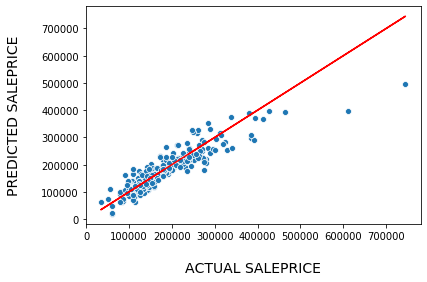

In [73]:
X_test = sm.add_constant(X_test)

y_pred = results.predict(X_test)
y_actual = Y_test

sns.scatterplot(x=y_actual, y=y_pred)
plt.plot(y_actual, y_actual, color='red')
plt.xlabel('ACTUAL SALEPRICE', fontsize=14, labelpad=20)
plt.ylabel('PREDICTED SALEPRICE', fontsize=14, labelpad=20)
plt.show()

It appears from the graph that our model predicts the lower values of our target better than the higher values of our target. <br>
Let's look at the metrics of our predictions

In [74]:
print('Mean absolute error: {}'.format(mean_absolute_error(y_actual, y_pred)))
print('Mean squared error: {}'.format(mse(y_actual, y_pred)))
print('Root mean squared error: {}'.format(rmse(y_actual, y_pred)))
print("Mean absolute percentage error: {}".format(np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100))

Mean absolute error: 23047.348309076002
Mean squared error: 1213443841.579112
Root mean squared error: 34834.52083177135
Mean absolute percentage error: 13.4465018417092


##### Let's add some features and see if we can improve the model.

In [75]:
# Let's create another variable by adding all of the square footages

df['total_sf'] = df['totalbsmtsf'] + df['firstflrsf'] + df['secondflrsf'] + df['grlivarea']

model_df['total_sf'] = df['total_sf']

# Let's log tranform our variables so they are more normally distributed

model_df['saleprice_log'] = np.log10(model_df['saleprice'])
model_df['total_sf_log'] = np.log(model_df['total_sf'])

In [76]:
# X is all the features for the model
X = model_df[['overallqual', 'total_sf_log', 'garagecars', 'fullbath',
              'yearbuilt', 'yearremodadd', 'neighborhood_Blueste', 'neighborhood_BrDale', 'neighborhood_BrkSide',
              'neighborhood_ClearCr', 'neighborhood_CollgCr', 'neighborhood_Crawfor', 'neighborhood_Edwards',
              'neighborhood_Gilbert', 'neighborhood_IDOTRR', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
              'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes', 'neighborhood_NoRidge',
              'neighborhood_NridgHt', 'neighborhood_OldTown', 'neighborhood_SWISU', 'neighborhood_Sawyer',
              'neighborhood_SawyerW', 'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
              'neighborhood_Veenker', 'exterqual_Fa', 'exterqual_Gd', 'exterqual_TA', 'kitchenqual_Fa',
              'kitchenqual_Gd', 'kitchenqual_TA', 'garagefinish_RFn', 'garagefinish_Unf', 'bsmtqual_Fa',
              'bsmtqual_Gd', 'bsmtqual_TA']]

# Y is our target
Y = model_df['saleprice_log']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=465)

X_train = sm.add_constant(X_train)

results = sm.OLS(Y_train, X_train).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          saleprice_log   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     185.2
Date:                Sun, 05 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:53:51   Log-Likelihood:                 1591.2
No. Observations:                1168   AIC:                            -3098.
Df Residuals:                    1126   BIC:                            -2886.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9397      0.407      2.311      0.021       0.142       1.737
overallqual              0.0300      0.003     11.455      0.000       0.025       0.035
total_sf_log             0.2226      0.010     21.269      0.000       0.202       0.243
garagecars               0.0313      0.004      8.350      0.000       0.024       0.039
fullbath                -0.0095      0.005     -1.851      0.064      -0.020       0.001
yearbuilt                0.0003      0.000      1.991      0.047    4.49e-06       0.001
yearremodadd             0.0008      0.000      6.125      0.000       0.001       0.001
neighborhood_Blueste    -0.0236      0.048     -0.489      0.625      -0.118       0.071
neighborhood_BrDale     -0.0465      0.026     -1.822      0.069      -0.097       0.004
neighborhood_BrkSide     0.0334      0.022      1.499      0.134      -0.010       0.077
neighborhood_ClearCr     0.0887      0.023      3.941      0.000       0.045       0.133
neighborhood_CollgCr     0.0461      0.018      2.508      0.012       0.010       0.082
neighborhood_Crawfor     0.1084      0.022      5.000      0.000       0.066       0.151
neighborhood_Edwards    -0.0004      0.020     -0.018      0.986      -0.040       0.039
neighborhood_Gilbert     0.0367      0.019      1.930      0.054      -0.001       0.074
neighborhood_IDOTRR     -0.0443      0.024     -1.821      0.069      -0.092       0.003
neighborhood_MeadowV    -0.0339      0.025     -1.359      0.175      -0.083       0.015
neighborhood_Mitchel     0.0239      0.021      1.143      0.253      -0.017       0.065
neighborhood_NAmes       0.0426      0.020      2.182      0.029       0.004       0.081
neighborhood_NPkVill     0.0096      0.032      0.300      0.764      -0.053       0.072
neighborhood_NWAmes      0.0355      0.020      1.780      0.075      -0.004       0.075
neighborhood_NoRidge     0.1189      0.021      5.759      0.000       0.078       0.159
neighborhood_NridgHt     0.0806      0.019      4.131      0.000       0.042       0.119
neighborhood_OldTown    -0.0217      0.022     -0.999      0.318      -0.064       0.021
neighborhood_SWISU       0.0210      0.025      0.848      0.397      -0.028       0.070
neighborhood_Sawyer      0.0311      0.020      1.518      0.129      -0.009       0.071
neighborhood_SawyerW     0.0322      0.020      1.604      0.109      -0.007       0.072
neighborhood_Somerst     0.0544      0.019      2.894      0.004       0.018       0.091
neighborhood_StoneBr     0.1118      0.023      4.881      0.000       0.067       0.157
neighborhood_Timber      0.0702      0.020      3.426      0.001       0.030       0.110
neighborhood_Veenker     0.0917      0.029      3.217      0.001       0.036       0.148
exterqual_Fa            -0.0044      0.027     -0.166    

Adjusted R-squared: .866 <br>
F-statistic: 185.2 <br>
AIC: -1150. <br>
BIC: -937.5 <br>

#### All of the values above are improvements from our first model.

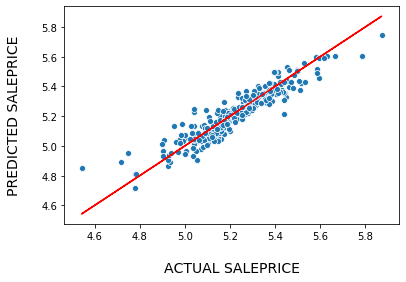

In [77]:
X_test = sm.add_constant(X_test)

y_pred = results.predict(X_test)

y_actual = Y_test

sns.scatterplot(x=y_actual, y=y_pred)
plt.plot(y_actual, y_actual, color='red')
plt.xlabel('ACTUAL SALEPRICE', fontsize=14, labelpad=20)
plt.ylabel('PREDICTED SALEPRICE', fontsize=14, labelpad=20)
plt.show()

It is difficult to compare this grpah to our first model, due to the log transformation of our target variable in the second model. However, it appears that our second model is much better at predicting saleprice than our first model. Now let's look at the prediction metrics.

In [78]:
print('Mean absolute error: {}'.format(mean_absolute_error(y_actual, y_pred)))
print('Mean squared error: {}'.format(mse(y_actual, y_pred)))
print('Root mean squared error: {}'.format(rmse(y_actual, y_pred)))
print("Mean absolute percentage error: {}".format(np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100))

Mean absolute error: 0.047173862243259215
Mean squared error: 0.004108267817577728
Root mean squared error: 0.0640957706684125
Mean absolute percentage error: 0.9082009752389816


Once again it is difficult to compare the metrics of this second model to our first model. This is due to the log transformation of our target variable. However, the metrics all appear better than our first model.